In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\harsh\Downloads\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

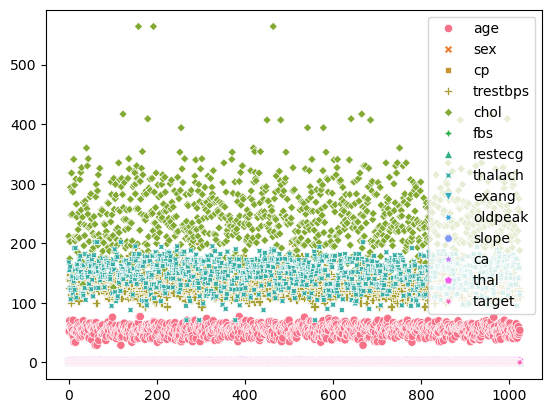

In [49]:
sns.scatterplot(df)

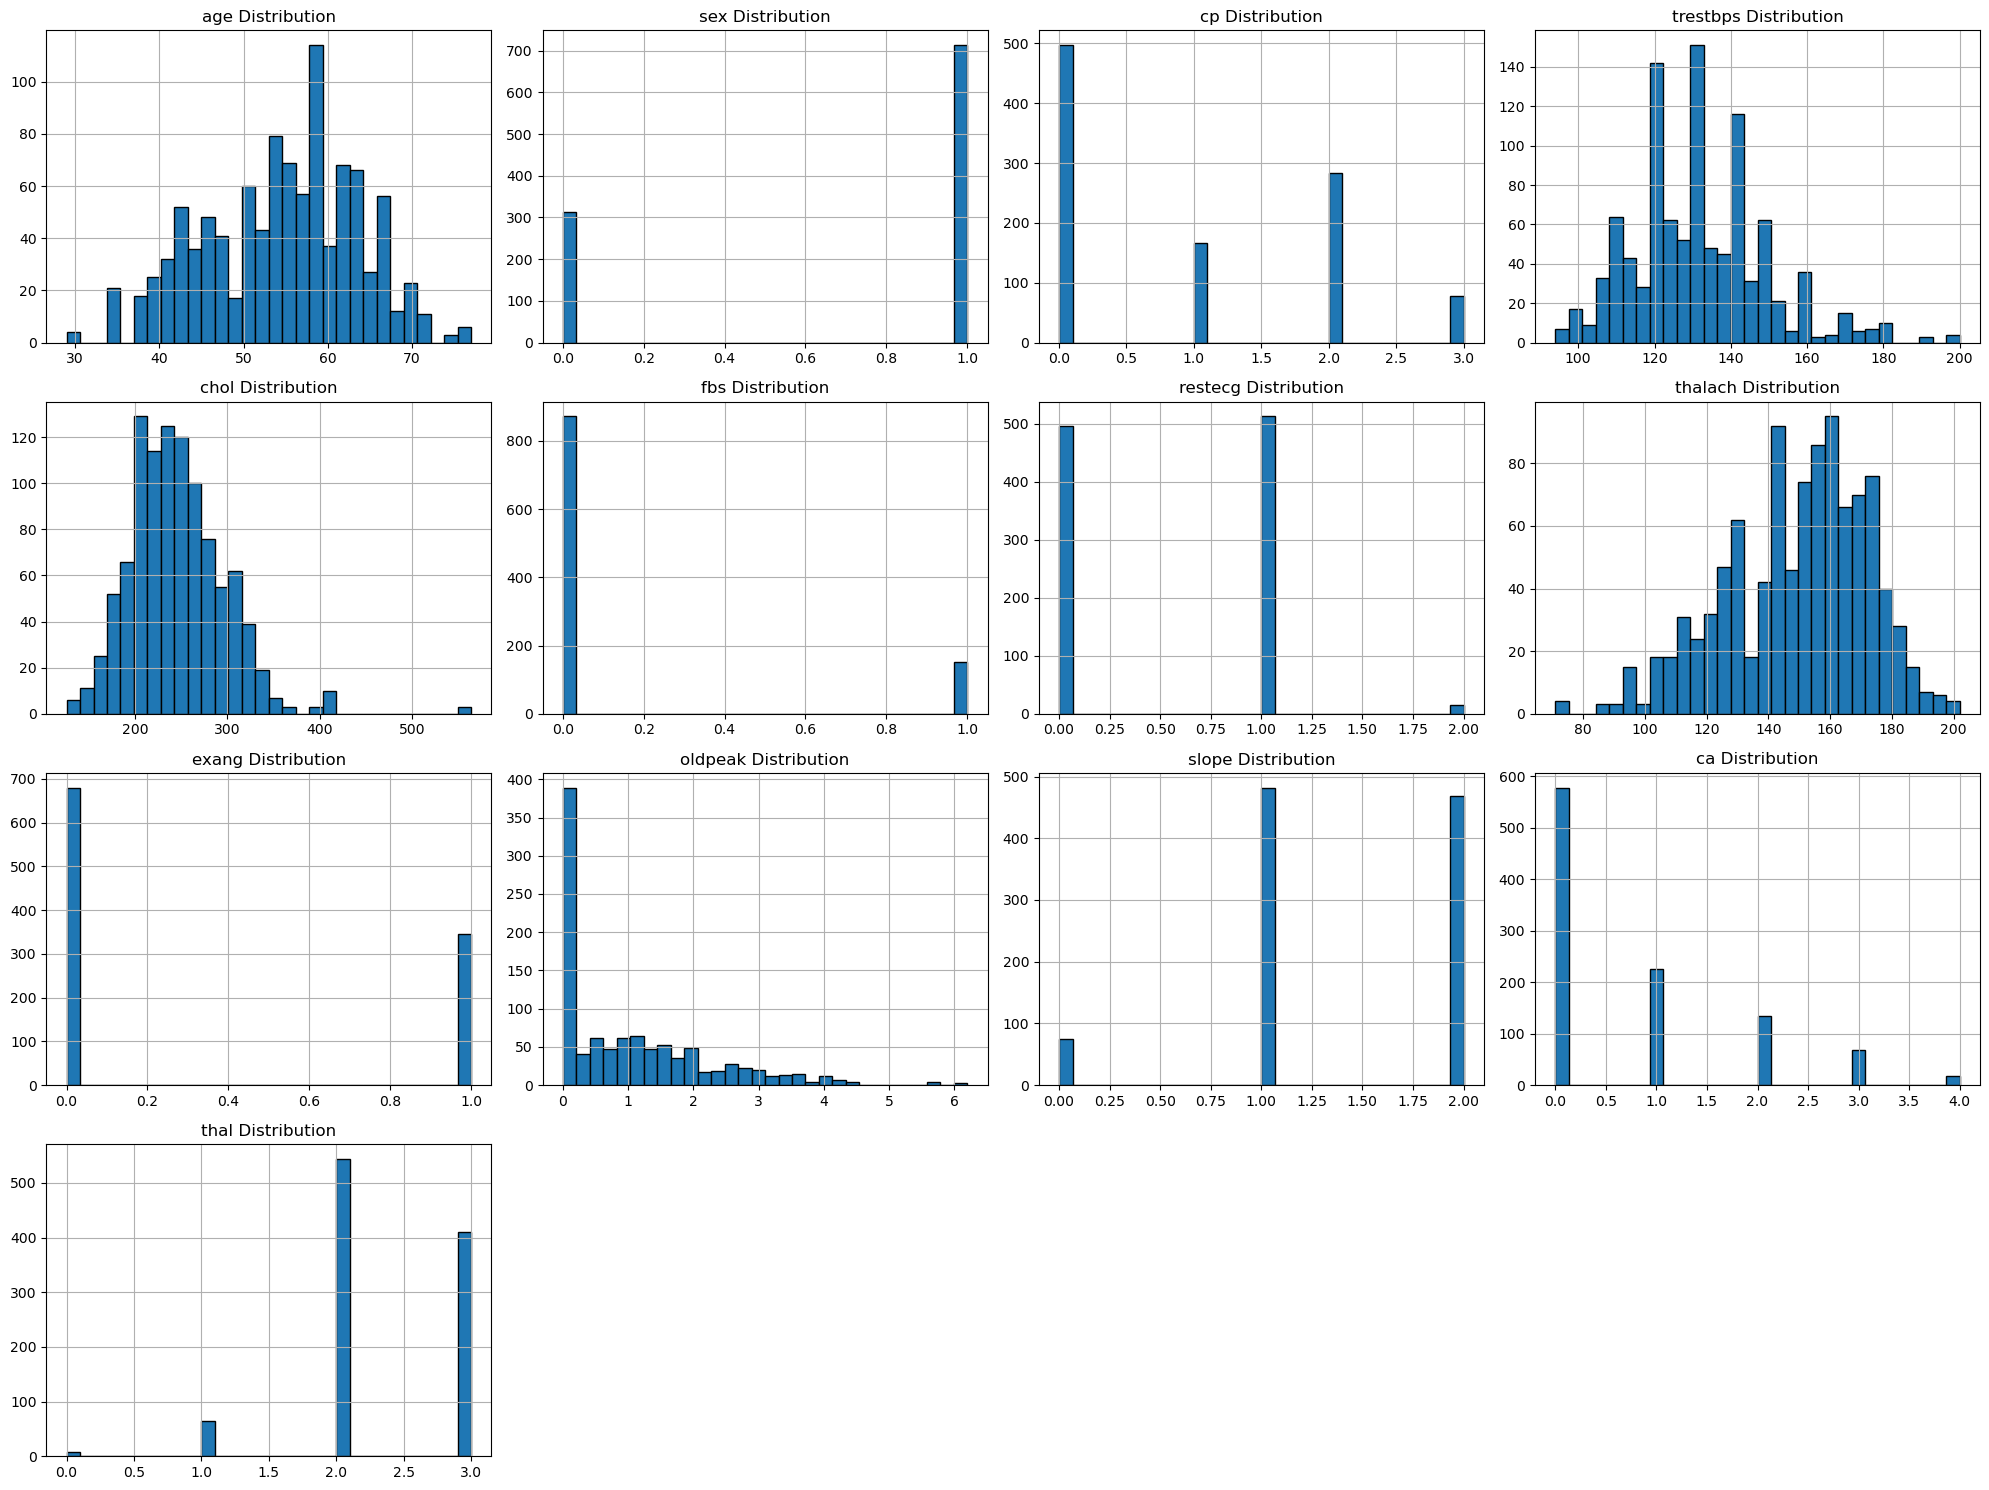

In [50]:
# List of features to plot
features = df.columns.drop('target')

# Plot histograms for original dataset (df)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    df[feature].hist(bins=30, edgecolor='black')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

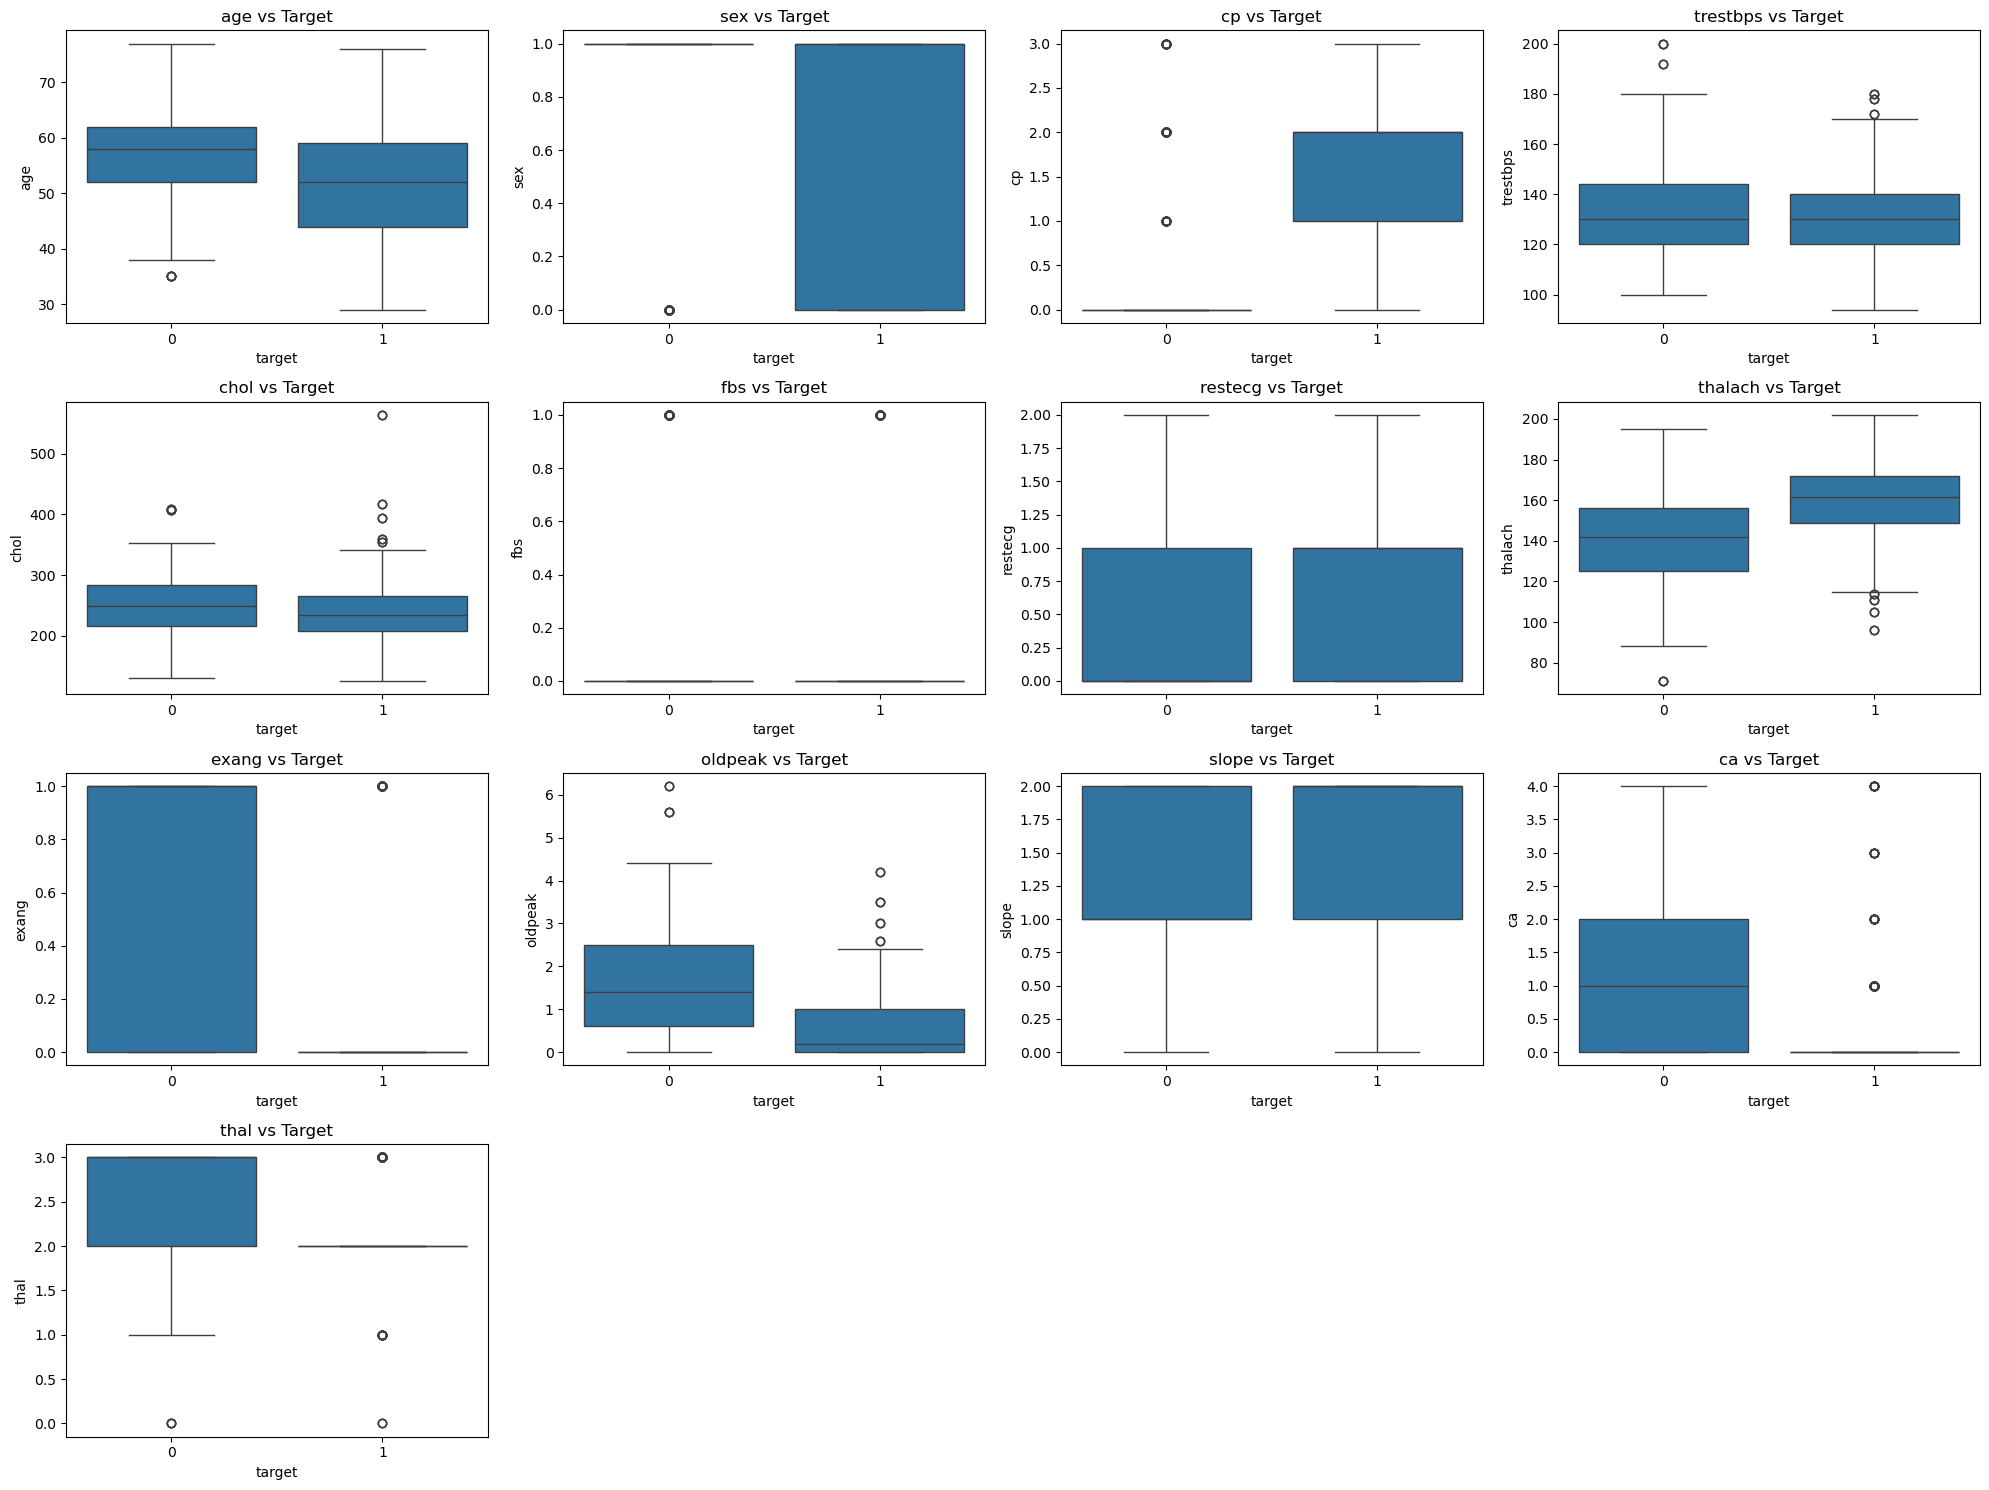

In [53]:
# Plot box plots for original dataset (df)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

# DATASET OVERVIEW
The dataset contains 1025 entries and 14 columns. Here are the columns:

- age: Age of the patient
- sex: Sex of the patient (1 = male, 0 = female)
- cp: Chest pain type (0, 1, 2, 3)
- trestbps: Resting blood pressure (in mm Hg)
- chol: Serum cholesterol (in mg/dl)
- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- restecg: Resting electrocardiographic results (0, 1, 2)
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment (0, 1, 2)
- ca: Number of major vessels (0-3) colored by fluoroscopy
- thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect)
- target: Target variable (1 = disease, 0 = no disease)

# Generate New Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures


In [10]:
# Create a copy of the original dataframe for feature engineering
df_fe = df.copy()

In [11]:
# Age grouping
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df_fe['age_group'] = pd.cut(df_fe['age'], bins=bins, labels=labels, right=False)



In [12]:
df_fe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,60-69
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [13]:
# Interaction terms
df_fe['age_chol_interaction'] = df_fe['age'] * df_fe['chol']
df_fe['trestbps_thalach_interaction'] = df_fe['trestbps'] * df_fe['thalach']



In [14]:
df_fe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_chol_interaction,trestbps_thalach_interaction
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59,11024,21000
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59,10759,21700
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79,12180,18125
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69,12383,23828
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69,18228,14628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,60-69,13039,22960
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69,15480,17625
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49,12925,12980
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59,12700,17490


In [15]:
# Polynomial features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(df_fe[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)



In [17]:
# Create a dataframe for polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

In [18]:
# Concatenate polynomial features with the original dataframe
df_fe = pd.concat([df_fe, df_poly], axis=1)

In [19]:
df_fe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps^2,trestbps chol,trestbps thalach,trestbps oldpeak,chol^2,chol thalach,chol oldpeak,thalach^2,thalach oldpeak,oldpeak^2
0,52,1,0,125,212,0,1,168,0,1.0,...,15625.0,26500.0,21000.0,125.0,44944.0,35616.0,212.0,28224.0,168.0,1.00
1,53,1,0,140,203,1,0,155,1,3.1,...,19600.0,28420.0,21700.0,434.0,41209.0,31465.0,629.3,24025.0,480.5,9.61
2,70,1,0,145,174,0,1,125,1,2.6,...,21025.0,25230.0,18125.0,377.0,30276.0,21750.0,452.4,15625.0,325.0,6.76
3,61,1,0,148,203,0,1,161,0,0.0,...,21904.0,30044.0,23828.0,0.0,41209.0,32683.0,0.0,25921.0,0.0,0.00
4,62,0,0,138,294,1,1,106,0,1.9,...,19044.0,40572.0,14628.0,262.2,86436.0,31164.0,558.6,11236.0,201.4,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,19600.0,30940.0,22960.0,0.0,48841.0,36244.0,0.0,26896.0,0.0,0.00
1021,60,1,0,125,258,0,0,141,1,2.8,...,15625.0,32250.0,17625.0,350.0,66564.0,36378.0,722.4,19881.0,394.8,7.84
1022,47,1,0,110,275,0,0,118,1,1.0,...,12100.0,30250.0,12980.0,110.0,75625.0,32450.0,275.0,13924.0,118.0,1.00
1023,50,0,0,110,254,0,0,159,0,0.0,...,12100.0,27940.0,17490.0,0.0,64516.0,40386.0,0.0,25281.0,0.0,0.00


In [20]:
df_fe.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group',
       'age_chol_interaction', 'trestbps_thalach_interaction', 'age',
       'trestbps', 'chol', 'thalach', 'oldpeak', 'age^2', 'age trestbps',
       'age chol', 'age thalach', 'age oldpeak', 'trestbps^2', 'trestbps chol',
       'trestbps thalach', 'trestbps oldpeak', 'chol^2', 'chol thalach',
       'chol oldpeak', 'thalach^2', 'thalach oldpeak', 'oldpeak^2'],
      dtype='object')

In [21]:
df_fe.isnull().sum()

age                             0
sex                             0
cp                              0
trestbps                        0
chol                            0
fbs                             0
restecg                         0
thalach                         0
exang                           0
oldpeak                         0
slope                           0
ca                              0
thal                            0
target                          0
age_group                       0
age_chol_interaction            0
trestbps_thalach_interaction    0
age                             0
trestbps                        0
chol                            0
thalach                         0
oldpeak                         0
age^2                           0
age trestbps                    0
age chol                        0
age thalach                     0
age oldpeak                     0
trestbps^2                      0
trestbps chol                   0
trestbps thala

In [22]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           1025 non-null   int64   
 1   sex                           1025 non-null   int64   
 2   cp                            1025 non-null   int64   
 3   trestbps                      1025 non-null   int64   
 4   chol                          1025 non-null   int64   
 5   fbs                           1025 non-null   int64   
 6   restecg                       1025 non-null   int64   
 7   thalach                       1025 non-null   int64   
 8   exang                         1025 non-null   int64   
 9   oldpeak                       1025 non-null   float64 
 10  slope                         1025 non-null   int64   
 11  ca                            1025 non-null   int64   
 12  thal                          1025 non-null   in

In [23]:
df_fe.dtypes

age                                int64
sex                                int64
cp                                 int64
trestbps                           int64
chol                               int64
fbs                                int64
restecg                            int64
thalach                            int64
exang                              int64
oldpeak                          float64
slope                              int64
ca                                 int64
thal                               int64
target                             int64
age_group                       category
age_chol_interaction               int64
trestbps_thalach_interaction       int64
age                              float64
trestbps                         float64
chol                             float64
thalach                          float64
oldpeak                          float64
age^2                            float64
age trestbps                     float64
age chol        

AS age_group IS CATEOGRICAL WE HAVE TO USE ENCODEING BEFORE PERMOING PCA

In [24]:
# One-hot encode the 'age_group' column
df_fe = pd.get_dummies(df_fe, columns=['age_group'], drop_first=True)

In [25]:
df_fe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol^2,chol thalach,chol oldpeak,thalach^2,thalach oldpeak,oldpeak^2,age_group_40-49,age_group_50-59,age_group_60-69,age_group_70-79
0,52,1,0,125,212,0,1,168,0,1.0,...,44944.0,35616.0,212.0,28224.0,168.0,1.00,False,True,False,False
1,53,1,0,140,203,1,0,155,1,3.1,...,41209.0,31465.0,629.3,24025.0,480.5,9.61,False,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,30276.0,21750.0,452.4,15625.0,325.0,6.76,False,False,False,True
3,61,1,0,148,203,0,1,161,0,0.0,...,41209.0,32683.0,0.0,25921.0,0.0,0.00,False,False,True,False
4,62,0,0,138,294,1,1,106,0,1.9,...,86436.0,31164.0,558.6,11236.0,201.4,3.61,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,48841.0,36244.0,0.0,26896.0,0.0,0.00,False,False,True,False
1021,60,1,0,125,258,0,0,141,1,2.8,...,66564.0,36378.0,722.4,19881.0,394.8,7.84,False,False,True,False
1022,47,1,0,110,275,0,0,118,1,1.0,...,75625.0,32450.0,275.0,13924.0,118.0,1.00,True,False,False,False
1023,50,0,0,110,254,0,0,159,0,0.0,...,64516.0,40386.0,0.0,25281.0,0.0,0.00,False,True,False,False


In [28]:
df_fe.dtypes

age                               int64
sex                               int64
cp                                int64
trestbps                          int64
chol                              int64
fbs                               int64
restecg                           int64
thalach                           int64
exang                             int64
oldpeak                         float64
slope                             int64
ca                                int64
thal                              int64
target                            int64
age_chol_interaction              int64
trestbps_thalach_interaction      int64
age                             float64
trestbps                        float64
chol                            float64
thalach                         float64
oldpeak                         float64
age^2                           float64
age trestbps                    float64
age chol                        float64
age thalach                     float64


In [35]:
# Drop the target column from features
features = df_fe.drop(columns=['target'])
target = df['target']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=principal_components)

In [38]:

print(df_pca.head())

         0         1         2         3         4         5         6   \
0 -1.750449 -0.219267  0.866862 -0.399525 -1.175217  2.022237 -1.121030   
1  2.360306 -2.799528  3.831337 -0.374332 -0.236827  2.125647 -0.585680   
2  4.143378 -3.378964  0.154799 -3.818163 -0.887902 -0.363126  0.977312   
3 -0.738141  2.177128  0.052910 -3.438296 -0.230022 -0.505565 -1.991960   
4  4.465953 -1.154415 -2.358489  0.224231  1.211156 -1.039145  0.610572   

         7         8         9         10        11        12  
0 -0.723134  1.156455 -0.678996  0.586459  0.862946 -0.255092  
1  1.078816 -1.020496  1.356922  0.063522 -2.121099 -0.840528  
2  1.205952  4.072704  1.537380 -0.593718 -2.223781  0.034233  
3 -1.412549  0.787439 -0.600921  0.185735  0.066055 -0.054977  
4  0.570113 -1.412953 -1.786303  2.869406  0.605113 -0.870025  


In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(features_scaled, df_fe['target'])
feature_importances = model.feature_importances_

In [40]:
feature_importances

array([0.02032406, 0.02013151, 0.09126834, 0.01703599, 0.01864625,
       0.00256009, 0.00424555, 0.03597092, 0.03363601, 0.04273806,
       0.01743994, 0.07024882, 0.07275586, 0.01888138, 0.02432758,
       0.02518038, 0.01479207, 0.01917814, 0.03462176, 0.02202692,
       0.02596597, 0.02134674, 0.02158167, 0.0262236 , 0.03726516,
       0.0185175 , 0.02338644, 0.02380739, 0.03297802, 0.0171389 ,
       0.01916363, 0.03442704, 0.03551584, 0.0222101 , 0.02757659,
       0.00168144, 0.00153427, 0.00256296, 0.00110712])

In [41]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': features.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                         feature  importance
2                             cp    0.091268
12                          thal    0.072756
11                            ca    0.070249
9                        oldpeak    0.042738
24                   age oldpeak    0.037265
7                        thalach    0.035971
32                     thalach^2    0.035516
18                       thalach    0.034622
31                  chol oldpeak    0.034427
8                          exang    0.033636
28              trestbps oldpeak    0.032978
34                     oldpeak^2    0.027577
23                   age thalach    0.026224
20                         age^2    0.025966
15                           age    0.025180
14  trestbps_thalach_interaction    0.024328
27              trestbps thalach    0.023807
26                 trestbps chol    0.023386
33               thalach oldpeak    0.022210
19                       oldpeak    0.022027
22                      age chol    0.021582
21        

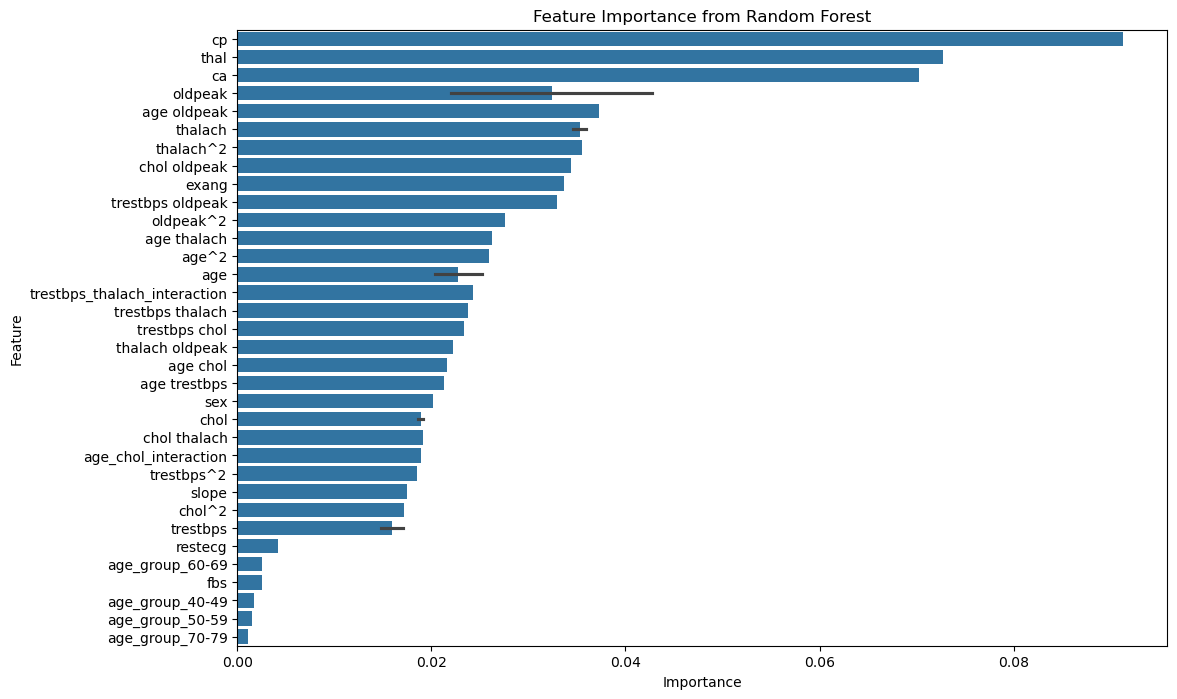

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

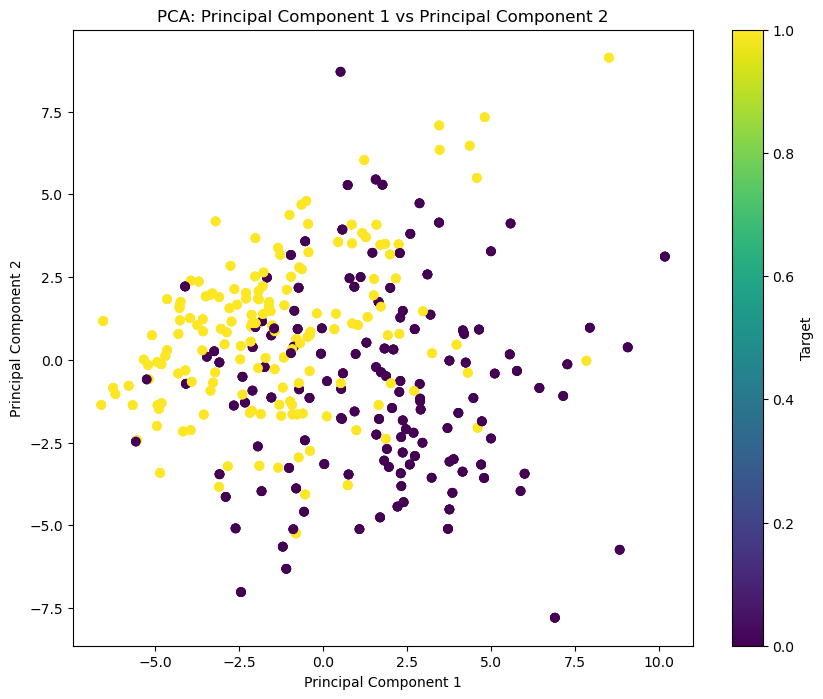

In [46]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[0], df_pca[1], c=target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.colorbar(label='Target')
plt.show()

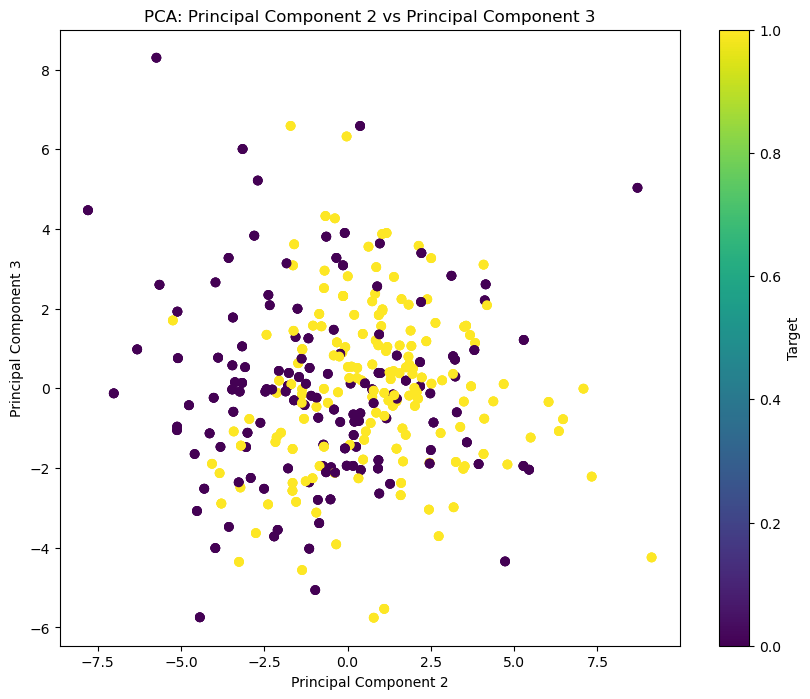

In [47]:
#Scatter plot of the second and third principal components
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[1], df_pca[2], c=target, cmap='viridis')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: Principal Component 2 vs Principal Component 3')
plt.colorbar(label='Target')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [43]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


## WITH THE HELP OF FEATURE ENGINEERING WE ACHIVED 99.9% MODEL ACCURACY